In [2]:
import igraph

graph = igraph.Graph(n=10, edges=[(0,1),(1,2),(0,2),(3,4),(3,5),(5,6),(6,7),(5,8),(6,8),(0,9),(8,9)])

vertices = graph.vs
edges = graph.es

duration_weights = [10, 5, 10, 3, 7, 4, 6, 5, 4, 2, 7]
graph.es["duration"] = duration_weights
values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
graph.vs["value"] = values
print(graph)




IGRAPH U--- 10 11 --
+ attr: value (v), duration (e)
+ edges:
0--1 1--2 0--2 3--4 3--5 5--6 6--7 5--8 6--8 0--9 8--9


In [3]:
print('#########FILTERED EDGES#########')
edge_sequence = graph.es.select(lambda edge: edge["duration"] < 5)
print([edge.index for edge in edge_sequence])

print('#########SPANNING TREE#########')
spanning_tree = graph.spanning_tree()
print(spanning_tree)


#########FILTERED EDGES#########
[3, 5, 8, 9]
#########SPANNING TREE#########
IGRAPH U--- 10 9 --
+ attr: value (v), duration (e)
+ edges:
0--1 0--2 3--4 3--5 6--7 5--8 6--8 0--9 8--9


<AxesSubplot:title={'center':'Spanning Tree'}>

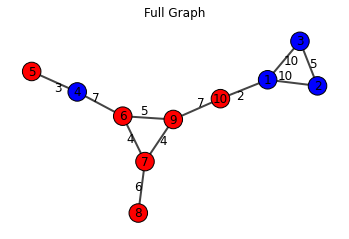

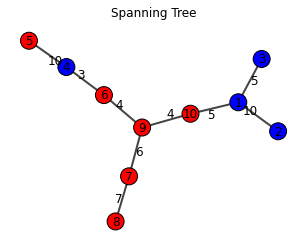

In [4]:
import matplotlib.pyplot as plt

visual_style = {}
visual_style["vertex_color"] = ["blue" if value < 5 else "red" for value in graph.vs["value"]]
visual_style["vertex_label"] = [str(value) for value in graph.vs["value"]]
visual_style["edge_label"] = [str(duration) for duration in graph.es["duration"]]
#visual_style["layout"] = graph.layout_kamada_kawai()
fig, ax = plt.subplots()
fig2, ax2 = plt.subplots()
ax.set_title("Full Graph")
igraph.plot(graph, target=ax, **visual_style)
ax2.set_title("Spanning Tree")
igraph.plot(spanning_tree, target=ax2, **visual_style)

In [17]:
import igraph

durations = [ # NOTE: duration 0 means task can not be processed on that particular workstation
    [0, 1, 2, 3, 4],
    [1, 2, 3, 4, 0],
    [2, 3, 4, 0, 1],
    [3, 4, 0, 1, 2],
    [4, 0, 1, 2, 3],
    [0, 1, 2, 3, 4],
    [1, 2, 3, 4, 0],
    [2, 3, 4, 0, 1],
]

product_recipes = [ # meaning: first 3 tasks in duration are the parts of recipe 1 (in sequence), next 3 ar the parts of recipe 2, last 2 are the parts of recipe 3
    3, 3, 2
]
offset = 0
product_graphs = []
for recipe in product_recipes:
    layers = []
    nodes = 0
    edges = []
    for i in range(recipe):
        layer = durations[offset + i]
        layer_workstations = []
        for j in range(len(layer)):
            if layer[j] > 0:
                layer_workstations.append(j)
        layers.append(layer_workstations)
        nodes += len(layer_workstations)
    #graph = igraph.Graph(n=recipe)
    offset += recipe
    node_offset = len(layers[0])
    for i in range(1, len(layers)):
        for j in range(len(layers[i])):
            for k in range(len(layers[i-1])):
                edges.append((layers[i-1][j], layers[i][k]))
    print(layers)
    print(edges)
    print(nodes)
    graph = igraph.Graph(n=nodes, edges=edges)
    product_graphs.append(graph)

[[1, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4]]
[(1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3), (4, 0), (4, 1), (4, 2), (4, 3), (0, 0), (0, 1), (0, 2), (0, 4), (1, 0), (1, 1), (1, 2), (1, 4), (2, 0), (2, 1), (2, 2), (2, 4), (3, 0), (3, 1), (3, 2), (3, 4)]
12
[[0, 1, 3, 4], [0, 2, 3, 4], [1, 2, 3, 4]]
[(0, 0), (0, 2), (0, 3), (0, 4), (1, 0), (1, 2), (1, 3), (1, 4), (3, 0), (3, 2), (3, 3), (3, 4), (4, 0), (4, 2), (4, 3), (4, 4), (0, 1), (0, 2), (0, 3), (0, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4)]
12
[[0, 1, 2, 3], [0, 1, 2, 4]]
[(0, 0), (0, 1), (0, 2), (0, 4), (1, 0), (1, 1), (1, 2), (1, 4), (2, 0), (2, 1), (2, 2), (2, 4), (3, 0), (3, 1), (3, 2), (3, 4)]
8


<AxesSubplot: title={'center': 'Full Graph'}>

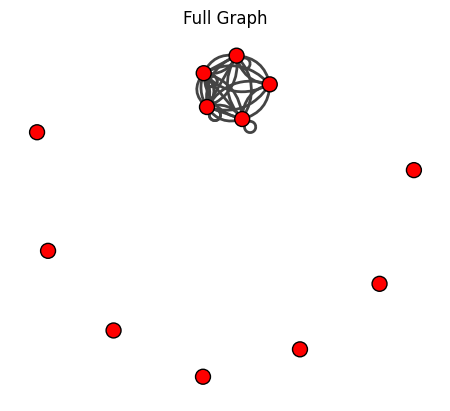

In [18]:
import matplotlib.pyplot as plt
graph = product_graphs[0]
fig, ax = plt.subplots()
ax.set_title("Full Graph")
igraph.plot(graph, target=ax)